In [ ]:
# # Restarting the core:|
import os
os._exit(0)


In [1]:
# Moment of tensor calculation
# Body
Ixx_body_n = 7.9 * (0.2**2 + 0.11**2)/ 12
Iyy_body_n = 7.9 * (0.4**2 + 0.11**2)/ 12
Izz_body_n = 7.9 * (0.4**2 + 0.2**2)/ 12
m_body_n = 7.9
l_body_n = 0.4

# Thigh
Ixx_thigh_n = 0.92 * (0.0245**2 + 0.034**2)/ 12
Iyy_thigh_n = 0.92 * (0.213**2 + 0.034**2)/ 12
Izz_thigh_n = 0.92 * (0.213**2 + 0.0245**2)/ 12
m_thigh_n = 0.92
l_thigh_n = 0.213
# calf
Ixx_calf_n = 0.1358 * (0.016**2 + 0.016**2)/ 12
Iyy_calf_n = 0.1358 * (0.213**2 + 0.016**2)/ 12
Izz_calf_n = 0.1358 * (0.213**2 + 0.016**2)/ 12
m_calf_n = 0.1358
l_calf_n = 0.213

# Body
print(Ixx_body_n)
print(Iyy_body_n )
print(Izz_body_n )
print()
# Thigh)
print(Ixx_thigh_n)
print(Iyy_thigh_n)
print(Izz_thigh_n)
print()
# calf)
print(Ixx_calf_n )
print(Iyy_calf_n )
print(Izz_calf_n )

0.03429916666666667
0.11329916666666669
0.13166666666666668

0.00013464583333333335
0.0035669166666666666
0.003524309166666667

5.794133333333333e-06
0.0005163229166666667
0.0005163229166666667


In [2]:
# from sympy import *
from sympy import symbols, Matrix, Function

from Multibody_analyzer.basic_math import *
from Multibody_analyzer.EMO_matrices import *
from Multibody_analyzer.link_object_class import *
from Multibody_analyzer.positional_conatraint_class import *
from Multibody_analyzer.multibody_system_class import *
from Multibody_analyzer.lqr_control import *
from Multibody_analyzer.Energy_shaping_control import *
from Multibody_analyzer.get_Descartes_2D import *

# from IPython.display import Math

import sys
import pylab as py
from matplotlib import animation

# init_printing() 

In [4]:
####### Define basic constants #######
t = symbols('t')
g = symbols('g')
gravitational_acc_vector = Matrix([0, -g, 0])
####### Define basic constants #######

In [5]:
####### Define generalized coordinates #######
x = Function('x')(t)
y = Function('y')(t)
theta_bot = Function('theta_bot')(t)
theta_left_1 = Function('theta_left_1')(t)
theta_left_2 = Function('theta_left_2')(t)
theta_right_1 = Function('theta_right_1')(t)
theta_right_2 = Function('theta_right_2')(t)

coordinate_list = [x,y,theta_bot, theta_left_1, theta_left_2, theta_right_1, theta_right_2]
generalized_coordinates_dimension, generalized_coordinates, generalized_velocities, generalized_accelerations = Create_generalized_coordinate_system(coordinate_list,t)
####### Define generalized coordinates #######
# generalized_coordinates


In [6]:
####### Define link 1 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m1 = symbols('m1')
lc1 = symbols('lc1') # Sub script 'c' means the center of mass
Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1 = symbols('Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1')

link_1_name = 'Body of the planer robot'
link_1_notes = 'Translates along x and y, rotates about z'
link_1_mass = m1
link_1_MoI = Create_Moment_of_Inertia_tensor(Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1)

HTM_x = construct_HTM(eye(3), [x,0,0])
HTM_y = construct_HTM(eye(3), [0,y,0])
HTM_Rz = construct_HTM(Rz(theta_bot), [0,0,0])
HTM1 = HTM_y * HTM_x * HTM_Rz
link_1_Orientation_matrix, link_1_CoG_vector = decompose_HTM(HTM1)

link1_Constants_symbols = [m1, lc1, Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1]
link1 = Create_link_object(link_1_name, link_1_notes, link_1_mass, link_1_MoI, link_1_CoG_vector, link_1_Orientation_matrix, generalized_coordinates, link1_Constants_symbols)
# link1.print_link_info()
####### Define link 1 properties #######


Link object 'Body of the planer robot' is created.


In [377]:
HTM_y*HTM_x

Matrix([
[1, 0, 0, x(t)],
[0, 1, 0, y(t)],
[0, 0, 1,    0],
[0, 0, 0,    1]])

In [7]:
# Provide link costants
link1.delete_link_Constant_numerical_values()
print(link1.link_Constants_symbolical)
# link1_Constants_numerical = [1,1,0,0,0,0,0,0]
link1_Constants_numerical = [m_body_n,l_body_n,Ixx_body_n,Iyy_body_n,Izz_body_n,0,0,0]

link1.provide_link_constant_numerical_values(link1_Constants_numerical)

Numerical value are not defined yet.
Please call "provide_link_constant_numerical_values()" function to redefine the values.
[m1, lc1, Ixx1, Iyy1, Izz1, Ixy1, Ixz1, Iyz1]
Please be sure that link_Constant is proveded in form of: [m1, lc1, Ixx1, Iyy1, Izz1, Ixy1, Ixz1, Iyz1] !!
Printing the numerical values. Please double check if they are correct.
Link mass m1 = 7.9kg
Link length from joint with its parent link lc_i = 0.4m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

In [8]:
####### Define link 2 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m2 = symbols('m2')
lc2 = symbols('lc2') # Sub script 'c' means the center of mass
Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2 = symbols('Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2')
# We need an additional parameter for length of link1,
l_body = symbols('l_body')

link_2_name = 'Left leg upper link, link 2'
link_2_notes = '1. Translates along the body away from center of mass by 1/2 of body length, l_body. \n 2. Rotate about the edge'
link_2_mass = m2
link_2_MoI = Create_Moment_of_Inertia_tensor(Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2)

HTM2 = HTM1 * construct_HTM(eye(3),[-0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_left_1),[0,0,0]) * construct_HTM(eye(3), [lc2, 0, 0])
link_2_Orientation_matrix, link_2_CoG_vector = decompose_HTM(HTM2)


link2_Constants_symbols = [m2, lc2, Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2, l_body]
link2 = Create_link_object(link_2_name, link_2_notes, link_2_mass, link_2_MoI, link_2_CoG_vector, link_2_Orientation_matrix, generalized_coordinates, link2_Constants_symbols)
# link1.print_link_info()
####### Define link 2 properties #######

Link object 'Left leg upper link, link 2' is created.


In [9]:
link2.delete_link_Constant_numerical_values()
print(link2.link_Constants_symbolical)
# link2_Constants_numerical = [1,1,0,0,0,0,0,0,4]
link2_Constants_numerical = [m_thigh_n,l_thigh_n,Ixx_thigh_n,Iyy_thigh_n,Izz_thigh_n,0,0,0,l_body_n]

link2.provide_link_constant_numerical_values(link2_Constants_numerical)

Numerical value are not defined yet.
Please call "provide_link_constant_numerical_values()" function to redefine the values.
[m2, lc2, Ixx2, Iyy2, Izz2, Ixy2, Ixz2, Iyz2, l_body]
Please be sure that link_Constant is proveded in form of: [m2, lc2, Ixx2, Iyy2, Izz2, Ixy2, Ixz2, Iyz2, l_body] !!
Printing the numerical values. Please double check if they are correct.
Link mass m2 = 0.92kg
Link length from joint with its parent link lc_i = 0.213m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

In [373]:
link1.

Matrix([
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0]])

In [10]:
####### Define link 3 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation


m3 = symbols('m3')
lc3 = symbols('lc3') # Sub script 'c' means the center of mass
Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3 = symbols('Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3')
# We need an additional parameter for length of link1,
l_left_1 = symbols('l_left_1')
l_left_2 = symbols('l_left_2')


link_3_name = 'Left leg lower link, link 3'
link_3_notes = 'Rotates about the R joint connected to Left leg upper link'
link_3_mass = m3
link_3_MoI = Create_Moment_of_Inertia_tensor(Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3)

HTM2_joint_to_joint = construct_HTM(eye(3),[-0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_left_1),[0,0,0]) * construct_HTM(eye(3), [l_left_1, 0, 0])
HTM3 = HTM1 * HTM2_joint_to_joint * construct_HTM(Rz(theta_left_2), [0,0,0]) * construct_HTM(eye(3), [lc3,0,0])
link_3_Orientation_matrix, link_3_CoG_vector = decompose_HTM(HTM3)

link3_Constants_symbols = [m3, lc3, Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3, l_left_1, l_left_2]
link3 = Create_link_object(link_3_name, link_3_notes, link_3_mass, link_3_MoI, link_3_CoG_vector, link_3_Orientation_matrix, generalized_coordinates, link3_Constants_symbols)
# link1.print_link_info()
####### Define link 3 properties #######

Link object 'Left leg lower link, link 3' is created.


In [11]:
link3.delete_link_Constant_numerical_values()
print(link3.link_Constants_symbolical)
# link3_Constants_numerical = [1,1,0,0,0,0,0,0,1,1]
link3_Constants_numerical = [m_calf_n,l_calf_n,Ixx_calf_n,Iyy_calf_n,Izz_calf_n,0,0,0,l_thigh_n,l_calf_n]

link3.provide_link_constant_numerical_values(link3_Constants_numerical)

Numerical value are not defined yet.
Please call "provide_link_constant_numerical_values()" function to redefine the values.
[m3, lc3, Ixx3, Iyy3, Izz3, Ixy3, Ixz3, Iyz3, l_left_1, l_left_2]
Please be sure that link_Constant is proveded in form of: [m3, lc3, Ixx3, Iyy3, Izz3, Ixy3, Ixz3, Iyz3, l_left_1, l_left_2] !!
Printing the numerical values. Please double check if they are correct.
Link mass m3 = 0.1358kg
Link length from joint with its parent link lc_i = 0.213m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

In [12]:
####### Define link 4 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m4 = symbols('m4')
lc4 = symbols('lc4') # Sub script 'c' means the center of mass
Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4 = symbols('Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4')
# We need an additional parameter for length of link1,
# l_body = symbols('l_body')

link_4_name = 'Right leg upper link, link 4'
link_4_notes = '1. Translates along the body away from center of mass by 1/2 of body length, l_body. \n 2. Rotate about the edge'
link_4_mass = m4
link_4_MoI = Create_Moment_of_Inertia_tensor(Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4)

HTM4 = HTM1 * construct_HTM(eye(3),[0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_right_1),[0,0,0]) * construct_HTM(eye(3), [lc4, 0, 0])
link_4_Orientation_matrix, link_4_CoG_vector = decompose_HTM(HTM4)

# constants symbols should not be pass in for the second time.
# link4_Constants_symbols = [m4, lc4, Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4, l_body]
link4_Constants_symbols = [m4, lc4, Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4]
link4 = Create_link_object(link_4_name, link_4_notes, link_4_mass, link_4_MoI, link_4_CoG_vector, link_4_Orientation_matrix, generalized_coordinates, link4_Constants_symbols)
# link1.print_link_info()
####### Define link 4 properties #######

Link object 'Right leg upper link, link 4' is created.


In [13]:
link4.delete_link_Constant_numerical_values()

print(link4.link_Constants_symbolical)
link4_Constants_numerical = [1,1,0,0,0,0,0,0]
link4_Constants_numerical = [m_thigh_n,l_thigh_n,Ixx_thigh_n,Iyy_thigh_n,Izz_thigh_n,0,0,0]

link4.provide_link_constant_numerical_values(link4_Constants_numerical)

Numerical value are not defined yet.
Please call "provide_link_constant_numerical_values()" function to redefine the values.
[m4, lc4, Ixx4, Iyy4, Izz4, Ixy4, Ixz4, Iyz4]
Please be sure that link_Constant is proveded in form of: [m4, lc4, Ixx4, Iyy4, Izz4, Ixy4, Ixz4, Iyz4] !!
Printing the numerical values. Please double check if they are correct.
Link mass m4 = 0.92kg
Link length from joint with its parent link lc_i = 0.213m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

In [14]:
####### Define link 5 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m5 = symbols('m5')
lc5 = symbols('lc5') # Sub script 'c' means the center of mass
Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5 = symbols('Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5')
# We need an additional parameter for length of link1,
l_right_1 = symbols('l_right_1')
l_right_2 = symbols('l_right_2')


link_5_name = 'Right leg lower link, link5'
link_5_notes = 'Rotates about the R joint connected to Right leg upper link'
link_5_mass = m5
link_5_MoI = Create_Moment_of_Inertia_tensor(Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5)

HTM4_joint_to_joint = construct_HTM(eye(3),[0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_right_1),[0,0,0]) * construct_HTM(eye(3), [l_right_1, 0, 0])
HTM5 = HTM1 * HTM4_joint_to_joint * construct_HTM(Rz(theta_right_2), [0,0,0]) * construct_HTM(eye(3), [lc5,0,0])
link_5_Orientation_matrix, link_5_CoG_vector = decompose_HTM(HTM5)

link5_Constants_symbols = [m5, lc5, Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5, l_right_1, l_right_2]
link5 = Create_link_object(link_5_name, link_5_notes, link_5_mass, link_5_MoI, link_5_CoG_vector, link_5_Orientation_matrix, generalized_coordinates, link5_Constants_symbols)
# link1.print_link_info()
####### Define link 5 properties #######

Link object 'Right leg lower link, link5' is created.


In [15]:
link5.delete_link_Constant_numerical_values()

print(link5.link_Constants_symbolical)
link5_Constants_numerical = [1,1,0,0,0,0,0,0,1,1]
link5_Constants_numerical = [m_calf_n,l_calf_n,Ixx_calf_n,Iyy_calf_n,Izz_calf_n,0,0,0,l_thigh_n,l_calf_n]

link5.provide_link_constant_numerical_values(link5_Constants_numerical)

Numerical value are not defined yet.
Please call "provide_link_constant_numerical_values()" function to redefine the values.
[m5, lc5, Ixx5, Iyy5, Izz5, Ixy5, Ixz5, Iyz5, l_right_1, l_right_2]
Please be sure that link_Constant is proveded in form of: [m5, lc5, Ixx5, Iyy5, Izz5, Ixy5, Ixz5, Iyz5, l_right_1, l_right_2] !!
Printing the numerical values. Please double check if they are correct.
Link mass m5 = 0.1358kg
Link length from joint with its parent link lc_i = 0.213m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

In [16]:

# ####### Constraint Equations #######
constraint_x_coord_left = -0.2
constraint_x_coord_right = 0.2


HTM_bot_left_foot = HTM1 * construct_HTM(eye(3),[-0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_left_1),[0,0,0]) * construct_HTM(eye(3), [l_left_1, 0, 0]) * construct_HTM(Rz(theta_left_2),[0,0,0]) * construct_HTM(eye(3), [l_left_2, 0, 0])
HTM_bot_right_foot = HTM1 * construct_HTM(eye(3),[0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_right_1),[0,0,0]) * construct_HTM(eye(3), [l_right_1, 0, 0]) * construct_HTM(Rz(theta_right_2),[0,0,0]) * construct_HTM(eye(3), [l_right_2, 0, 0])

_, HTM_bot_left_foot_Vec = decompose_HTM(HTM_bot_left_foot)
_, HTM_bot_right_foot_Vec = decompose_HTM(HTM_bot_right_foot)

# positional_constrain_left_foot = create_positional_constraint_equation_object(HTM_bot_left_foot_Vec+Matrix([2.3,0,0]), t, generalized_coordinates) 
# positional_constrain_right_foot = create_positional_constraint_equation_object(HTM_bot_right_foot_Vec-Matrix([2.3,0,0]), t, generalized_coordinates) 
positional_constrain_left_foot = create_positional_constraint_equation_object(HTM_bot_left_foot_Vec - Matrix([constraint_x_coord_left,0,0]), t, generalized_coordinates) 
positional_constrain_right_foot = create_positional_constraint_equation_object(HTM_bot_right_foot_Vec - Matrix([constraint_x_coord_right,0,0]), t, generalized_coordinates) 


In [17]:
# ####### Contact coordinate vectors #######
# Contact point coordinates 2D
# Form each contact coordinate into 3x1 matrix
contact_coordinate_list = [np.transpose(np.matrix([constraint_x_coord_left,0,0])), 
                           np.transpose(np.matrix([constraint_x_coord_right,0,0]))]

In [18]:
# Control matrix
B_mat = Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print('Control matrix:')
display(B_mat)

Control matrix:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [19]:
link_object_list = [link1, link2, link3, link4, link5]

# underactuated control matrix
B_mat = Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
u1,u2,u3,u4 = symbols('u1,u2,u3,u4')
u_vec = Matrix([u1, u2, u3, u4])

constraint_equation_list = [positional_constrain_left_foot, positional_constrain_right_foot]
# BSP_alpha = 60
BSP_alpha = 120
%time multibody_system = system_full_nonlinear_dynamics(link_object_list, generalized_coordinates, t, gravitational_acc_vector,g, B_mat, u_vec, constraint_equation_list, BSP_alpha)

os.system('say "Multibody system object is successfully created."')

(t, g, x(t), y(t), theta_bot(t), theta_left_1(t), theta_left_2(t), theta_right_1(t), theta_right_2(t), Derivative(x(t), t), Derivative(y(t), t), Derivative(theta_bot(t), t), Derivative(theta_left_1(t), t), Derivative(theta_left_2(t), t), Derivative(theta_right_1(t), t), Derivative(theta_right_2(t), t), u1, u2, u3, u4)
                                  Multibody system is created.

CPU times: user 2min 32s, sys: 308 ms, total: 2min 32s
Wall time: 2min 33s


0

In [76]:
# Target pose angel calculator:

Target_height =  .3 # [m]
l_upper = l_thigh_n
l_lower = l_calf_n

target_angle_upper = -(np.pi/2 - np.arccos(Target_height/(2*l_upper)))
target_angle_lower = 2 * target_angle_upper

print(target_angle_upper)
print(target_angle_lower)

-0.7813314651190204
-1.5626629302380408


In [317]:
# LQR
# # Provided pose must satisfy that constraint forces are small.

# target_pose = [0,0.28,0 ,-1* np.pi/4-0.23, -1*np.pi/2, -1* np.pi/4+0.23, -1*np.pi/2]
# target_pose = [0,0.28,0 ,-1* np.pi/4, -1*np.pi/2, -1* np.pi/4, -1*np.pi/2]
target_pose = [0,Target_height,0 ,target_angle_upper,
                                  target_angle_lower,
                                  target_angle_upper,
                                  target_angle_lower]

# Q = np.eye(8) # Note that Q R matrices are for actuated DOF state vector only
# Q = eye(8)
Q = np.matrix([[10., 0., 0., 0., 0., 0., 0., 0.],
               [0., 10., 0., 0., 0., 0., 0., 0.],
               [0., 0., 10., 0., 0., 0., 0., 0.],
               [0., 0., 0., 10., 0., 0., 0., 0.],
               [0., 0., 0., 0., 1., 0., 0., 0.],
               [0., 0., 0., 0., 0., 1., 0., 0.],
               [0., 0., 0., 0., 0., 0., 1., 0.],
               [0., 0., 0., 0., 0., 0., 0., 1.]])

R = np.matrix([[1., 0., 0., 0.],
               [0., 1., 0., 0.],
               [0., 0., 1., 0.],
               [0., 0., 0., 1.]]) * 0.01


multibody_system.print_controller_status()
u_initial = multibody_system.lqr_controller_initialization(target_pose, Q, R, '2D', contact_coordinate_list)


LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> True
Use Energy shaper? ==> False
Use Automatic control? ==> False
Use Data logger? ==> True
                          Creating LQR controller with given pose.
                                Calculation mode is 2D mode.

(3, 1)
Total mass of the system is 10.0116kg.
System center of gravity is at:
[[0.0278598935333541]
 [0.264227226233082]
 [0]]
Solving reaction force lambda vectors.
Current calculatio mode is 2D!
Left contact point is at x = -0.2m.
Right contact point is at x = 0.2m.

System center of gravity is at x=0.02786, y=0.26423
Equilibrium control vector at given pose is solved!



100%|████████████████████████████████████▉| 399/400 [15:59:00<02:24, 144.21s/it]


Linearized system is controllable.
                                 LQR controller is created.
                                 Stable control output u_0 given pose is as below.
 u_0 = [1.2641412093100068, 6.089569876527662, 1.23048674392731, 8.124844191561303]

Returning u_0 vector


In [318]:
# Energy shaping
target_pose = target_pose

multibody_system.Energy_shaping_controller_initialization(target_pose)




                                 Energy shaping controller is created.
                                 Controller used: u = -k_gain * q_2_dot
                                 Controller gain: k_gain = 1000



In [319]:
# Data logger
multibody_system.data_logger_initialization()
multibody_system.Active_data_logger = True


Data logger is created.
                                 Data logger is created.

                             Use below index words to log data.

                                't_n'
                                'current_state_vector_n'
                                'target_state_vector_n'
                                'current_control_mode'
                                'current_control_vector_n'
                                'current_mechanical_energy'
                                'current_kinetic_energy'
                                'current_potential_energy'
                                'target_mechanical_energy'
                                'target_kinetic_energy'
                                'target_potential_energy'
                                'current_energy_error'
                                'ground_reaction_force'
                                'Lyapunov_stable_condition'



In [320]:
# multibody_system.Use_LQR = True
# multibody_system.Use_Energy_shaper = False
# multibody_system.Use_Automatic_switch_controller = False
# multibody_system.print_controller_status()


In [321]:
odeeeeeeeeeee = multibody_system.calculate_StateSpace_Lambdify_ConstraintForce_OdeForSolver()

LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> True
Use Energy shaper? ==> False
Use Automatic control? ==> False
Use Data logger? ==> True
                 Baumgarte stabilization parameter alpha = 120 is passed in.
(t, g, x(t), y(t), theta_bot(t), theta_left_1(t), theta_left_2(t), theta_right_1(t), theta_right_2(t), Derivative(x(t), t), Derivative(y(t), t), Derivative(theta_bot(t), t), Derivative(theta_left_1(t), t), Derivative(theta_left_2(t), t), Derivative(theta_right_1(t), t), Derivative(theta_right_2(t), t), u1, u2, u3, u4)


In [322]:

u = u_initial

print(u)


[1.2641412093100068, 6.089569876527662, 1.23048674392731, 8.124844191561303]


In [323]:
sim_num

26

In [324]:
# sim_num = 2
cos(np.pi/2 -1.25323) * l_thigh_n * 2

0.404699215516161

In [347]:
# Reinitialization before simulation
multibody_system.data_logger.clear_log()
multibody_system.Use_LQR = False
multibody_system.Use_Energy_shaper = False
multibody_system.Use_Automatic_switch_controller = True
multibody_system.print_controller_status()

multibody_system.Energy_shaping_controller.set_controller_gain(10)
multibody_system.controller_switching_threshold = 5
multibody_system.set_saturation_value([23.7,35.55,23.7,35.55]) # Passin u_max list [u1_max, u2_max, ... , un_max]
print('\n')

start = 0
end = .2
total_step = 400

t_span = np.linspace(start, end, total_step)


# initial_conditions = [0,1.414,0 ,-1* np.pi/4-0.1, -1*np.pi/2, -1* np.pi/4+0.1, -1*np.pi/2, 0,0,0, 0,0,0,0]
# initial_conditions = target_pose + [0,-10,0,0,0,0,0]

initial_conditions = [0,.404,0,-1.25323,-0.31756*2,-1.25323,-0.31756*2] + [0,-4.5,0,0,0,0,0]


###########
g_n = 9.81


constant = (g_n,*tuple(u))
print(constant)
dt = (end - start) / total_step



start_time = time.time()
print(bcolors.WARNING + 'Start calculating.' + bcolors.ENDC)
# sol = odeint(system_state_space_n, y0 = initial_conditions, t = t_span, tfirst=True, args=constant)

with tqdm(total=total_step, unit="steps",position=0, leave=True) as pbar:
    sol = odeint(odeeeeeeeeeee, y0 = initial_conditions, t = t_span, tfirst=True, args=( pbar, [start, (end-start)/total_step], *constant))

print(bcolors.WARNING + 'Calculation is completed in {}s'.format(round(time.time() - start_time,3)))

multibody_system.raw_integration_result = sol # Store raw result
multibody_system.data_logger.raw_integration_result = sol
os.system('say "Numerical integration is completed."')
os.system('say "Raw integration result is stored to raw_integration_result variable"')


Stored data is cleared!
LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> False
Use Energy shaper? ==> False
Use Automatic control? ==> True
Use Data logger? ==> True
Controller gain is set to k_gain = 10
Motor saturation output is set to [23.7, 35.55, 23.7, 35.55] Nm


(9.81, 1.2641412093100068, 6.089569876527662, 1.23048674392731, 8.124844191561303)
Start calculating.


  0%|                                                | 0/400 [00:00<?, ?steps/s]/Users/ayashigure/Desktop/multibody_code_2024_1_26_backup25/Multibody_simulator_version4/Multibody_analyzer/Energy_shaping_control.py:174: RuntimeWarning: divide by zero encountered in divide
  Lyapunov_stable_condition = S / (-(current_actuated_generalized_velocity_vector * np.transpose(current_actuated_generalized_velocity_vector)))
 18%|███████                                | 72/400 [00:27<03:52,  1.41steps/s]

Controller is switched to LQR


100%|██████████████████████████████████████| 400/400 [00:52<00:00,  7.58steps/s]


Calculation is completed in 52.762s


0

In [348]:
# Create folder and log the data
# sim_num = 15
sim_num += 1
multibody_system.data_logger.data_save(sim_num)
os.system('say "Result data from Simulation number {} is saved to visualized folder."'.format(sim_num))

/Users/ayashigure/Desktop/multibody_code_2024_1_26_backup25/Multibody_simulator_version4/Multibody_analyzer/data_logger_class.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(save_path, np.array([self.t_n ,


Raw data is saved to ./visualized/Simulation No28/Simulation Raw data sol No28!


0

In [349]:
# integration_step = len(multibody_system.data_logger.current_kinetic_energy)
t_print = multibody_system.data_logger.t_n

def list_checker(target_list,t_print):
    binarilized_list = []
    for i in range(len(target_list) - 1):
        if target_list[i] == target_list[i+1]:
            binarilized_list.append(0)
        else:
            binarilized_list.append(1)
            changed_flag = True
            changed_time = t_print[i]

        if sum(binarilized_list) == 0:
            changed_flag = False
            changed_time = 0
    return binarilized_list, changed_flag, changed_time


check_result, changed_flag , changed_time = list_checker(multibody_system.data_logger.current_control_mode, t_print) 

if changed_flag == False:
    os.system('say "Something maybe wrong, Connntroller is not switched at all."')
else:
    os.system('say "Connntroller is switched from energy shaping to LQR at {} seconds."'.format(np.round(changed_time,2)))
# plt.plot(t_print, np.ones(len(t_print)))
# plt.axvline(x = changed_time, color = 'b')


In [350]:

f = open("./visualized/Simulation No{}/Simulation parameters.txt".format(sim_num), "a")
f.writelines('Simulation No.{}\n'.format(sim_num))
f.writelines('\n\n')

f.writelines('Initial conditions: \n{}\n\n'.format(initial_conditions))
f.writelines('Target_pose:        \n{}\n\n'.format(target_pose))

f.writelines('LQR parameters:        \n'.format(target_pose))
f.writelines('Q matrix:        \n')
f.writelines('{}\n\n'.format(Q))

f.writelines('R matrix:        \n'.format(target_pose))
f.writelines('{}\n\n'.format(R))

f.writelines('Energy shaping(Velocity control) gain:        {}\n\n'.format(multibody_system.Energy_shaping_controller.controller_gain))
f.writelines('BSP alpha:        {}\n\n'.format(multibody_system.BSP_alpha))
f.writelines('Contact coordinates:        \n{}\n\n'.format(contact_coordinate_list))

f.close()

os.system('say "Oh my dear holy nolnol"')
os.system('say "And simulation parameter log is generated."')


0

In [351]:
os.system('say "Oh my dear nolnol"')


0

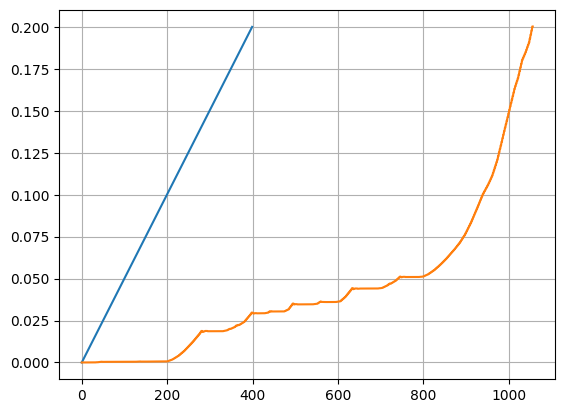

In [352]:
plt.plot(t_span)
plt.plot(t_print)
plt.grid()
plt.show()

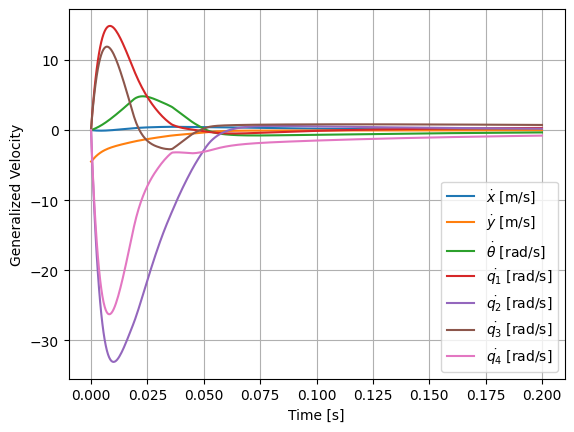

In [353]:
# Generalized velocity solution
# USE 't_span' here!

system_dimension = multibody_system.system_dimension
for i in range(system_dimension):
    # plot x_dot, y_dot, theta_dot, q_dot_1~4
    plt.plot(t_span, sol.T[system_dimension + i])
plt.grid()
plt.legend([r'$\dot{x}$ [m/s]', 
            r'$\dot{y}$ [m/s]',
            r'$\dot{\theta}$ [rad/s]',
            r'$\dot{q_1}$ [rad/s]',
            r'$\dot{q_2}$ [rad/s]',
            r'$\dot{q_3}$ [rad/s]',
            r'$\dot{q_4}$ [rad/s]'], loc= 'lower right')

plt.xlabel('Time [s]')
plt.ylabel('Generalized Velocity')
plt.savefig('./visualized/Simulation No{}/Generalized velocity plot.png'.format(sim_num))

plt.show()


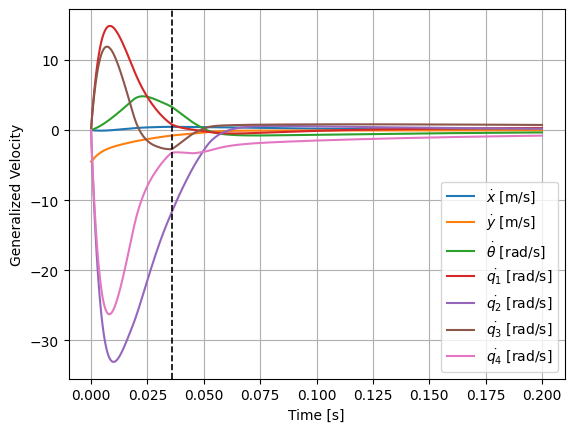

0

In [354]:
# Generalized velocity solution
# USE 't_span' here!

system_dimension = multibody_system.system_dimension
for i in range(system_dimension):
    # plot x_dot, y_dot, theta_dot, q_dot_1~4
    plt.plot(t_span, sol.T[system_dimension + i])
plt.grid()
plt.legend([r'$\dot{x}$ [m/s]', 
            r'$\dot{y}$ [m/s]',
            r'$\dot{\theta}$ [rad/s]',
            r'$\dot{q_1}$ [rad/s]',
            r'$\dot{q_2}$ [rad/s]',
            r'$\dot{q_3}$ [rad/s]',
            r'$\dot{q_4}$ [rad/s]'],loc='lower right')

plt.xlabel('Time [s]')
plt.ylabel('Generalized Velocity')
plt.axvline(x = changed_time, color = 'k', linestyle='--',linewidth=1.2)
plt.savefig('./visualized/Simulation No{}/Generalized velocity plot2.png'.format(sim_num))

plt.show()
os.system('say "Generalized velocity plot is generated."')


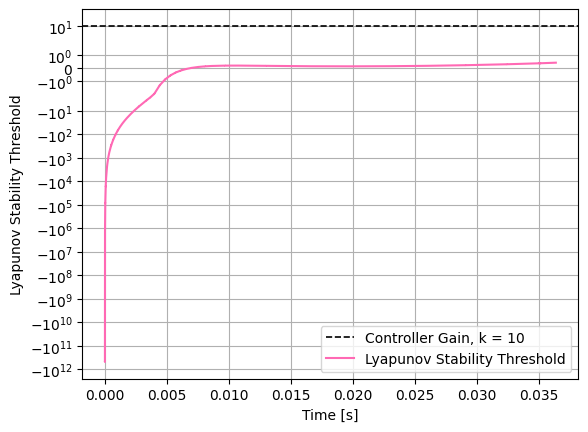

0

In [355]:
# multibody_system.data_logger.Lyapunov_stable_condition

Lyapunov_stable_condition = []
t_print_short = []
for i in range(len(multibody_system.data_logger.Lyapunov_stable_condition)):
    # Elements after LQR is on are set to 0.
    if multibody_system.data_logger.Lyapunov_stable_condition[i] != 0.:
        Lyapunov_stable_condition.append(multibody_system.data_logger.Lyapunov_stable_condition[i].item())
        t_print_short.append(multibody_system.data_logger.t_n[i])

energy_shaper_gain = multibody_system.Energy_shaping_controller.controller_gain

plt.axhline(y = energy_shaper_gain, color = 'k', linestyle='--',linewidth=1.2)
plt.plot(t_print_short, Lyapunov_stable_condition, color = 'hotpink') # mediumvioletred
plt.legend(['Controller Gain, k = {}'.format(energy_shaper_gain),'Lyapunov Stability Threshold'])
plt.grid()
plt.yscale('symlog')
plt.xlabel('Time [s]')
plt.ylabel('Lyapunov Stability Threshold')

plt.savefig('./visualized/Simulation No{}/Lyapunov stablity.png'.format(sim_num))
plt.show()

os.system('say "Liiaponov stability condition plot is generated."')

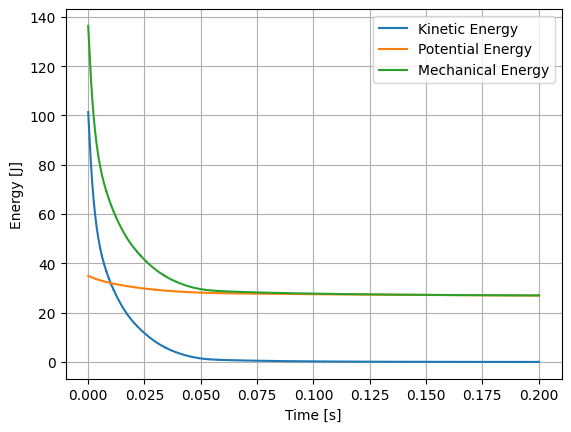

In [356]:


KE = []
PE = []
ME = []
for i in range(len(multibody_system.data_logger.current_kinetic_energy)):
    KE.append(multibody_system.data_logger.current_kinetic_energy[i].item())
    PE.append(multibody_system.data_logger.current_potential_energy[i].item())
    ME.append((multibody_system.data_logger.current_kinetic_energy[i] + multibody_system.data_logger.current_potential_energy[i]).item())
plt.plot(t_print, KE)
plt.plot(t_print, PE)
plt.plot(t_print, ME)

plt.grid()
plt.legend(['Kinetic Energy', 'Potential Energy', 'Mechanical Energy'])
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.savefig('./visualized/Simulation No{}/Energy_plot.png'.format(sim_num))
plt.show()



# Target_ME = []
# Energy_error = []
# for i in range(len(multibody_system.data_logger.target_mechanical_energy)):
#     Target_ME.append(multibody_system.data_logger.target_mechanical_energy[i].item())
#     Energy_error.append(multibody_system.data_logger.current_energy_error[i].item())
# plt.plot(Target_ME)
# plt.plot(Energy_error)




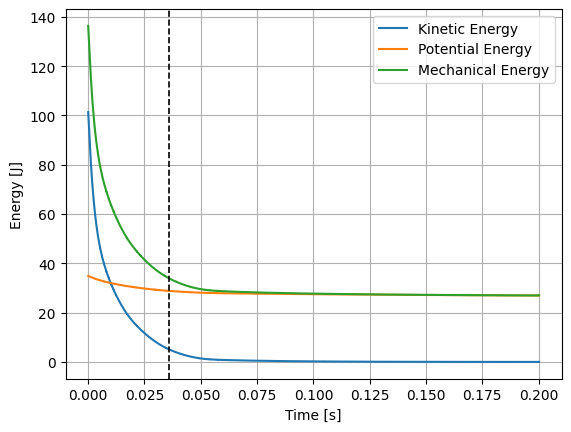

0

In [357]:

KE = []
PE = []
ME = []
for i in range(len(multibody_system.data_logger.current_kinetic_energy)):
    KE.append(multibody_system.data_logger.current_kinetic_energy[i].item())
    PE.append(multibody_system.data_logger.current_potential_energy[i].item())
    ME.append((multibody_system.data_logger.current_kinetic_energy[i] + multibody_system.data_logger.current_potential_energy[i]).item())
plt.plot(t_print, KE)
plt.plot(t_print, PE)
plt.plot(t_print, ME)

plt.grid()
plt.legend(['Kinetic Energy', 'Potential Energy', 'Mechanical Energy'])
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.axvline(x = changed_time, color = 'k', linestyle='--',linewidth=1.2)

plt.savefig('./visualized/Simulation No{}/Energy_plot2.png'.format(sim_num))
plt.show()

os.system('say "Energy plot is generated."')


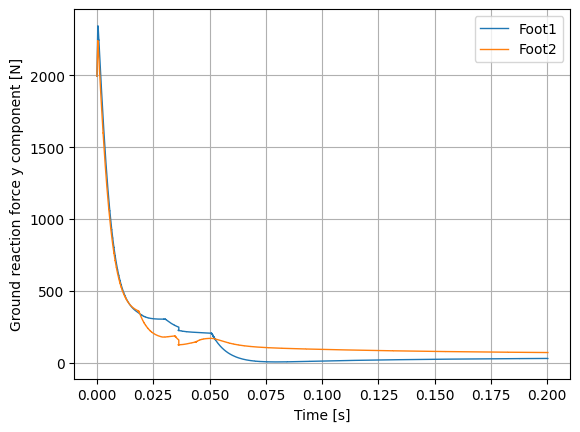

In [358]:
multibody_system.data_logger.ground_reaction_force

Foot1 = []
Foot2 = []
for i in range(len(multibody_system.data_logger.ground_reaction_force)):
    Foot1.append(multibody_system.data_logger.ground_reaction_force[i][0].item())
    Foot2.append(multibody_system.data_logger.ground_reaction_force[i][1].item())

plt.plot(t_print, Foot1, linewidth=1)
plt.plot(t_print, Foot2, linewidth=1)

plt.grid()
plt.legend(['Foot1', 'Foot2'])
plt.ylabel("Ground reaction force y component [N]")
plt.xlabel("Time [s]")
plt.savefig('./visualized/Simulation No{}/Ground_reaction.png'.format(sim_num))
plt.show()



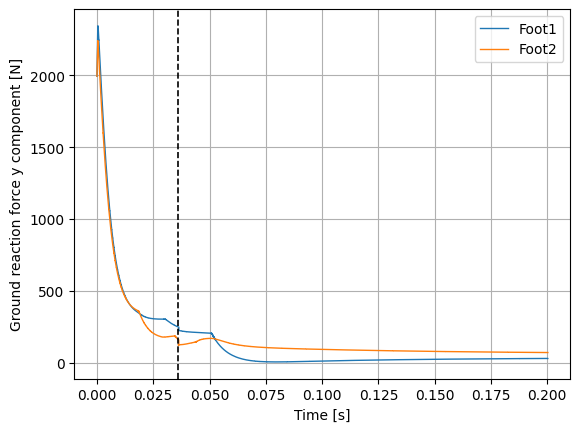

0

In [359]:
multibody_system.data_logger.ground_reaction_force

Foot1 = []
Foot2 = []
for i in range(len(multibody_system.data_logger.ground_reaction_force)):
    Foot1.append(multibody_system.data_logger.ground_reaction_force[i][0].item())
    Foot2.append(multibody_system.data_logger.ground_reaction_force[i][1].item())

plt.plot(t_print, Foot1, linewidth=1)
plt.plot(t_print, Foot2, linewidth=1)

plt.grid()
plt.legend(['Foot1', 'Foot2'])
plt.ylabel("Ground reaction force y component [N]")
plt.xlabel("Time [s]")
plt.axvline(x = changed_time, color = 'k',  linestyle='--', linewidth=1.2)

plt.savefig('./visualized/Simulation No{}/Ground_reaction2.png'.format(sim_num))
plt.show()

os.system('say "Ground reaction force plot is generated."')


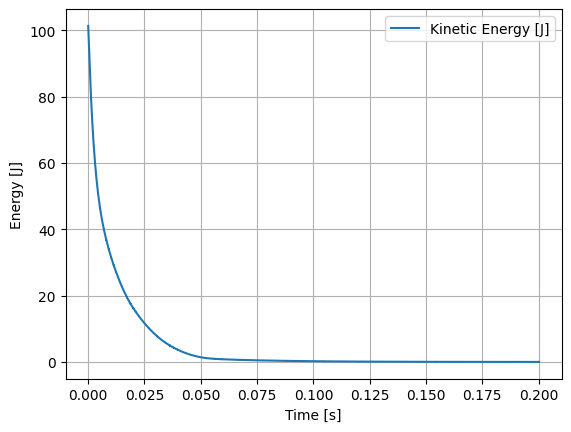

In [360]:
plt.plot(t_print, KE)
plt.legend(['Kinetic Energy [J]'])
plt.grid()
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.savefig('./visualized/Simulation No{}/Kinetic energy.png'.format(sim_num))

plt.show()


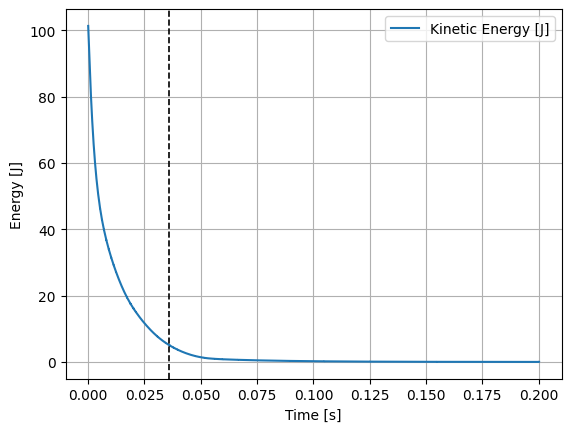

0

In [361]:
plt.plot(t_print, KE)
plt.legend(['Kinetic Energy [J]'])
plt.grid()
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.axvline(x = changed_time, color = 'k',  linestyle='--', linewidth=1.2)
plt.savefig('./visualized/Simulation No{}/Kinetic energy2.png'.format(sim_num))

plt.show()
os.system('say "Kinetic Energy plot is generated."')


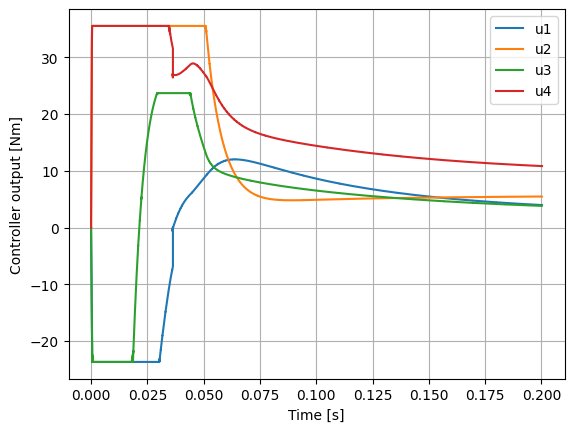

In [362]:
u1 = []
u2 = []
u3 = []
u4 = []
for item in multibody_system.data_logger.current_control_vector_n:
    u1.append(item[0].item())
    u2.append(item[1].item())
    u3.append(item[2].item())
    u4.append(item[3].item())
plt.plot(t_print, u1)
plt.plot(t_print, u2)
plt.plot(t_print, u3)
plt.plot(t_print, u4)

plt.legend(['u1','u2','u3','u4'])
plt.grid()
plt.ylabel("Controller output [Nm]")
plt.xlabel("Time [s]")

plt.savefig('./visualized/Simulation No{}/Controller behavior.png'.format(sim_num))

plt.show()



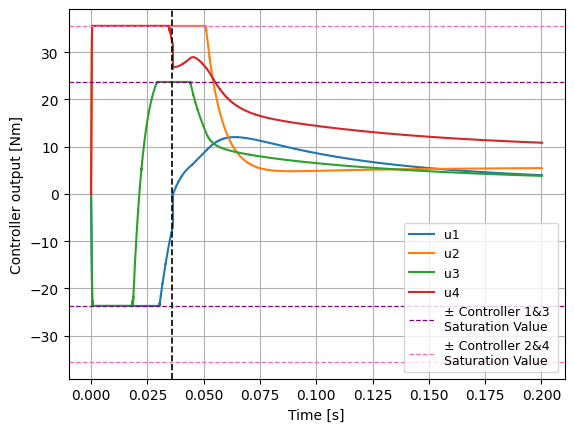

0

In [363]:
controller_saturation = multibody_system.u_max

u1 = []
u2 = []
u3 = []
u4 = []
for item in multibody_system.data_logger.current_control_vector_n:
    u1.append(item[0].item())
    u2.append(item[1].item())
    u3.append(item[2].item())
    u4.append(item[3].item())
plt.plot(t_print, u1)
plt.plot(t_print, u2)
plt.plot(t_print, u3)
plt.plot(t_print, u4)

plt.legend(['u1','u2','u3','u4'])
plt.grid()
plt.ylabel("Controller output [Nm]")
plt.xlabel("Time [s]")
linewidth = 0.9
plt.axhline(y = controller_saturation[0], color = 'purple', linestyle='--',linewidth=linewidth)
plt.axhline(y = controller_saturation[1], color = 'hotpink', linestyle='--',linewidth=linewidth)
plt.axhline(y = -controller_saturation[0], color = 'purple', linestyle='--',linewidth=linewidth)
plt.axhline(y = -controller_saturation[1], color = 'hotpink', linestyle='--',linewidth=linewidth)
plt.legend(['u1','u2','u3','u4','± Controller 1&3 \nSaturation Value','± Controller 2&4 \nSaturation Value'], fontsize="9")


plt.axvline(x = changed_time, color = 'k',  linestyle='--', linewidth=1.2)

plt.savefig('./visualized/Simulation No{}/Controller behavior2.png'.format(sim_num))

plt.show()

os.system('say "Conntroller behavior plot is generated."')


In [364]:
# Solve for Descartes coordinates

link_constant_numerical = [l_body_n, l_thigh_n, l_calf_n, l_thigh_n, l_calf_n]
# = get_decart(l_body, l_left_1, l_left_2, l_right_1, l_right_2, generalized_coordinates, sol, link_constant_numerical)
# from Multibody_analyzer.get_Descartes_2D import get_Descartes_2D

(body_left_x,  body_left_y,  body_right_x, body_right_y,  left_knee_x,  left_knee_y,  left_foot_x,  left_foot_y,  right_knee_x, right_knee_y,  right_foot_x,  right_foot_y) = get_Descartes_2D(l_body, 
                                  l_left_1, 
                                  l_left_2, 
                                  l_right_1, 
                                  l_right_2, 
                                  generalized_coordinates, 
                                  sol, 
                                  link_constant_numerical)





In [365]:
len(multibody_system.data_logger.current_kinetic_energy)

1057

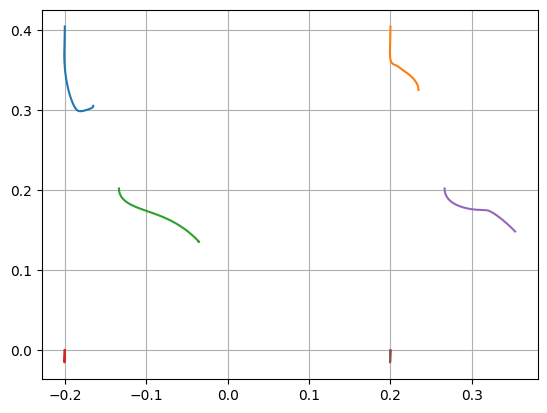

0

In [366]:
plt.plot(body_left_x, body_left_y)
plt.plot(body_right_x, body_right_y,)
plt.plot(left_knee_x, left_knee_y)
plt.plot(left_foot_x, left_foot_y)
plt.plot(right_knee_x, right_knee_y)
plt.plot(right_foot_x, right_foot_y)
plt.grid()
plt.savefig('./visualized/Simulation No{}/Bot xy.png'.format(sim_num))

plt.show()

os.system('say "Planer bot x y plot is generated."')


In [367]:
sim_num

28

100%|████████████████████████████████████████▊| 398/400 [00:22<00:00, 15.80it/s]

Saved to ./visualized/Simulation No28/2D_bot_sim_28_with_ic=[0.0, 0.404, 0.0, -1.253, -0.635, -1.253, -0.635, 0.0, -4.5, 0.0, 0.0, 0.0, 0.0, 0.0]_AND_control=[1.264, 6.09, 1.23, 8.125].mp4


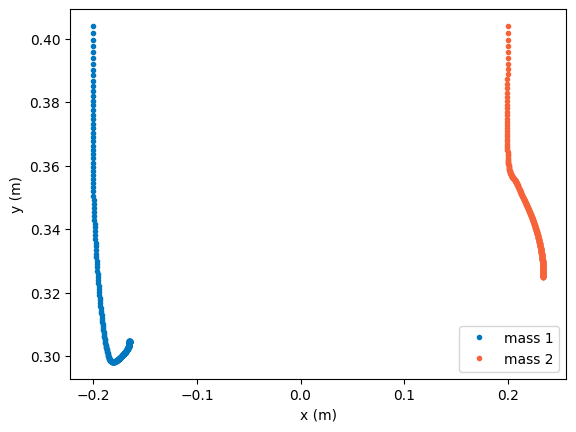

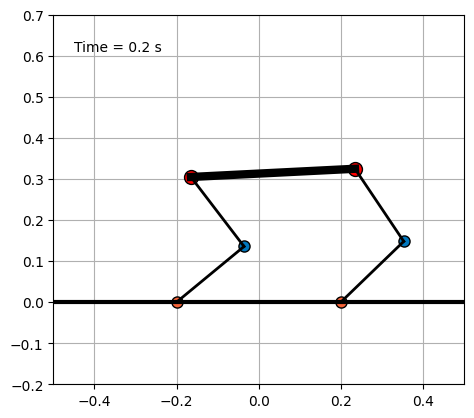

0

In [368]:
# https://github.com/zaman13/Double-Pendulum-Motion-Animation/blob/master/Python%20Code/Double_Pendulum_v1.py
# sim_num += 1
# save_name = '2D_bot_sim_{}_with_ic={}_AND_control={}'.format(sim_num,initial_conditions,[u1,u2,u3,u4,u5,u6,u7])
save_name = '2D_bot_sim_{}_with_ic={}_AND_control={}'.format(sim_num,np.round(initial_conditions, 3).tolist(),np.round(u,3).tolist())

# print('{}'.format(initial_conditions))


py.close('all')

py.figure(1)
#py.plot(t,x1)
#py.plot(t,y1)
py.plot(body_left_x,body_left_y,'.',color = '#0077BE',label = 'mass 1')
py.plot(body_right_x,body_right_y,'.',color = '#f66338',label = 'mass 2' )
py.legend()
py.xlabel('x (m)')
py.ylabel('y (m)')

#py.figure(2)
#py.plot(t,x2)
#py.plot(t,y2)


fig = plt.figure()
ax = plt.axes(xlim=(-.5, .5), ylim=(-.2, .7))
ax.set_aspect('equal')
ax.grid()

#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#FF0000',markersize = 10, markerfacecolor = '#FF0000',lw=2, markevery=10000, markeredgecolor = 'k')   # line1, bot left edge
line2, = ax.plot([], [], 'o-',color = '#FF0000',markersize = 10, markerfacecolor = '#FF0000',lw=2, markevery=10000, markeredgecolor = 'k')   # line2, bot right edge
line3, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 8, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line3, bot left knee
line4, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 8, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line4, bot left foot
line5, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 8, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line5, bot right knee
line6, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 8, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line6, bot right foot

line_bot, = ax.plot([], [], color='k', linestyle='-', linewidth=6)
line_left_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line_left_2, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line_right_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line_right_2, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

# line5, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ground_bar, = ax.plot([], [], color='k', linestyle='-', linewidth=3)

# initialization function: plot the background of each frame
def init():
    ground_bar.set_data([-8,8],[0,0])

    # These are dots
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])

    # These are lines
    line_bot.set_data([], [])
    line_left_1.set_data([], [])
    line_left_2.set_data([], [])
    line_right_1.set_data([], [])
    line_right_2.set_data([], [])
    
    time_string.set_text('')

    return  line1, line2, line3, line4, line5, line6, line_bot, line_left_1, line_left_2, line_right_1, line_right_2 ,time_string,ground_bar






# plt.plot(body_left_x, body_left_y)
# plt.plot(body_right_x, body_right_y,)
# plt.plot(left_knee_x, left_knee_y)
# plt.plot(left_foot_x, left_foot_y)
# plt.plot(right_knee_x, right_knee_y)
# plt.plot(right_foot_x, right_foot_y)

# animation function.  This is called sequentially
def animate(i):
    
    dt = t_span[2]-t_span[1]          # time step

    line1.set_data(body_left_x[i], body_left_y[i])   # body left edge
    line2.set_data(body_right_x[i], body_right_y[i])   # body right edge 
    line3.set_data(left_knee_x[i], left_knee_y[i])
    line4.set_data(left_foot_x[i], left_foot_y[i])
    line5.set_data(right_knee_x[i], right_knee_y[i])
    line6.set_data(right_foot_x[i], right_foot_y[i])
    
    
    line_bot.set_data([body_left_x[i], body_right_x[i]], [body_left_y[i], body_right_y[i]])
    line_left_1.set_data([body_left_x[i], left_knee_x[i]], [body_left_y[i], left_knee_y[i]])
    line_left_2.set_data([left_knee_x[i], left_foot_x[i]], [left_knee_y[i], left_foot_y[i]])
    line_right_1.set_data([body_right_x[i], right_knee_x[i]], [body_right_y[i], right_knee_y[i]])
    line_right_2.set_data([right_knee_x[i], right_foot_x[i]], [right_knee_y[i], right_foot_y[i]])
    
    # line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])       # line connecting y1 block to weight 1
    # line4.set_data([x2[i], x3[i]], [y2[i],y3[i]])                # line connecting weight 1 to weight 2

    # line5.set_data([x1[i]], [y1[i]]) # y1 block
    time_string.set_text(time_template % (i*dt))

    return  line1, line2, line3, line4, line5, line6, line_bot, line_left_1, line_left_2, line_right_1, line_right_2 ,time_string,ground_bar


# Add progress bar method is found from:
# https://stackoverflow.com/questions/60998231/python-how-to-make-tqdm-print-one-line-of-progress-bar-in-shell
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tqdm(range(total_step), position=0, leave=True), interval=1000*( t_span[2]-t_span[1])*0.8, blit=True)



# anim.save('./gif_output/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]), extra_args=['-vcodec', 'libx264'])
# anim.save('./visualized/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]))
anim.save('./visualized/Simulation No{}/{}.mp4'.format(sim_num, save_name), fps=1.0/(t_span[2]-t_span[1]), extra_args=['-vcodec', 'libx264'])

print('Saved to ./visualized/Simulation No{}/{}.mp4'.format(sim_num, save_name))




plt.show()
os.system('say "Please be adviced that your lengthy calculation has beed successfully executed, animation is ready to be reviewed"')


In [369]:
# os.system('say "Aya should cosplay kainé"')

In [370]:
# os.system('say "nia mao should do it"')

In [371]:
# os.system('say "nia lu haai"')

100%|████████████████████████████████████████▊| 398/400 [00:37<00:00, 15.80it/s]